# Lab 5 - Topic Modeling and Named Entity Recognition
## Exercises

___
## Topic Analysis and Unsupervised vs Supervised learning

**1. What is the difference between supervised and unsupervised learning? Discuss some benefits and issues for each approach in the context of topic analysis.**

The main difference between supervised and unsupervised learning is weather or not the data provided is labeled. Using a method like clustering you provide the algorithm with unlabeled data recving clusters based of latent structures within the data. These clusters are only labeled using arbitrary letters or numbers not providing the user with any information apart from the observations latent similarities. While using a machine learning approch like decision trees you activly divide and sort the obervations based of labeld data in the sense that ypu wish to acchive a result that minimises the error based of the existing y-label. Providing a DTC with unlabeld data would make it useless as there is no method to train the model without knowing having an actual baseline. Vice versa providing the machine learning model of k-means clustering with labeld data would only make the approch pointless as the labels themselfs would simply be a feature in the approch to create clusters.

Essentially weather there is a target variable or a target label is what differentiates the two learning approches.

___

**2. You are presented with a large dataset of news articles where only 50% of the data has labeled topics (finance, sports, politics, etc.). You want to assign labels to the remaining data. Explain which approach you would take (no programming!)**

I am assuming the task here is to label the articles by hand. With that in mind the best approch would likely be to read the article and afterwards assign a given topic as a label based of what the contents of the article is. A less accurate but less time concuming approch would be only reading the titles or initial paragraph to the articles as this often provides a good enough understanding of the topic at hand.

___

**3. Could the previous question be improved by incorporating ideas from semi-supervised learning? Explain.**

I am assuming this relates to ML problems where we have a set of label data that can be utilised for traning and a set of unlabeld data used as a test set for the model. In such a case simply providing any machine learning model that can be trained on the labeled data would likely be a decent model. Weather it outperforms a human reading depends on the amount of training data provided and the model used. Likely a human reading the whole article would be quite accurate. However, the ML model would likely be much less costly in terms of time consumption.

___

**4. Metrics are essential when dealing with machine learning. However, regarding unsupervised clustering (e.g., of topics), we cannot use the typical precision, recall, and f-measure metrics. What are the alternatives for this task?**

Unsupervised ML models require different metrics as they dont have any predefined correct label. Metrics as shilouette score, Gap statistics, Davies–Bouldin index, homogeneity, completeness, V-measure.

___

## Topic Modeling

Given the five sentences:

>"Macrosoft announces a new Something Pro laptop with a detachable keyboard."

>"Melon Tusk unveils plans for a new spacecraft that could take humans to Mars."

>"The top-grossing movie of the year Ramvel Retaliators."

>"Geeglo releases a new version of its Cyborg operating system."

>"Fletnix announces a new series from the creators of Thinger Strangs."

**1. How would *you* (without programming) assign the listed sentences to separate topics? Consider techniques we have discussed in the course so far (especially Lab 4)**

I would probably assign the following labels:
1. Technology
2. Spacetravel
3. Entertainment
4. Technology
5. Entertainment

Redaing the sentences and applying a label that applies to the sentences. Words like macrosoft, laptop, keyboard and geeglo, cyborg, system indicated they both relate to a technical topic. While words like movie and fletnix series and Thinger Strangs would indicate that we are talking about entertainment.

___

Two well-established algorithms for topic discovery are Latent Semantic Indexing (LSI) and Latent Dirichlet Allocation (LDA)

**2. What preprocessing steps should we consider before implementing these algorithms?**

I assume that there most of the normal preprocessing steps would be used in LSI and LDA applications. Tokenization, stopword removal, stemming and lemmatization as well as using methods like part of speach tagging and possibly dependency parsing. Possibly looking into ngrams and such could also provide benefical info, but i assume it has little benefit to the actual model itself.           

___

**3. Both LSI and LDA require the user to specify the number of topic clusters. How can we attempt to *automatically* detect a reasonable number of topics?**

One possible method is utilising a distance measure like eculidian distance to find the optimal number of clusters or topics based of the data. This does however reqires alot of time to process. Doing this with samples could offset the computational load, but there is likely more efficient methods. Metrics lik AIC and BIC scores normaly work well for model selection and i assume they would be apliccable in thsi case aswell.

___

## Practical Exercise - Topic Analysis and Modeling of Product Reviews
We will now be using an Amazon product review dataset to perform topic modeling. The dataset specifically contains reviews of "appliances", a subset (~100k reviews, ~50 MB) of the full product review corpus (<https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset> - 55GB!)

This task is somewhat open, and whether you want to just cluster isolated reviews, or within subsets from the review score, is up to you.

**1. Load the dataset with `pandas`, apply some preprocessing steps you find suitable, and use at least five different techniques to visualize the data, based on what you have learned in the course.**
- Hint: look up exploratory data analysis (EDA)

In [2]:
# TODO visualize the reviews in at least five different ways
# must include some of the techniques used in this course.
# this can be plots, graphs, trees, lists, other statistics, ...
import pandas as pd

df = pd.read_csv("amazon_train.csv")
df.head()


,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body
0,1,1,1,Y,Do not buy this product,I am not a big review writer and truth be told...
1,4,0,0,Y,Wattage is not as advertised.,"Not the advertised 700W. It's actually 1050W,..."
2,1,0,21,Y,don't buy it! $40 to return it. ...,Looks very cheap.... the worse inversion in m...
3,5,0,0,Y,water tastes good.,"Quick shipping, water tastes good."
4,1,8,10,N,Poor quality microwave ruins the product,This unit has the HMB5050 Microwave integrated...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72625 entries, 0 to 72624
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   star_rating        72625 non-null  int64 
 1   helpful_votes      72625 non-null  int64 
 2   total_votes        72625 non-null  int64 
 3   verified_purchase  72625 non-null  object
 4   review_headline    72624 non-null  object
 5   review_body        72621 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.3+ MB


In [4]:
df = df.dropna(axis=0)

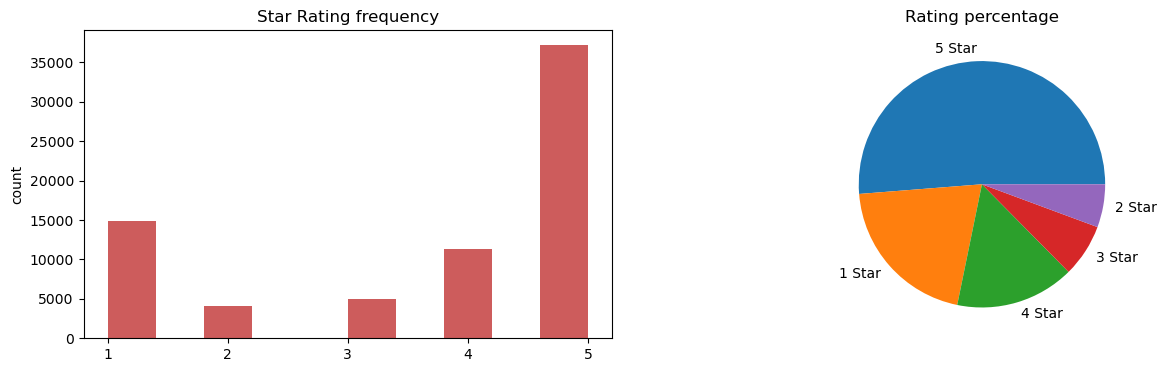

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_rating_pct = df["star_rating"].value_counts()/df["star_rating"].count()

plt.figure(figsize = (15, 4))
plt.tight_layout()
plt.subplot(1, 2, 1)
df["star_rating"].hist(grid=False, color="indianred")
plt.xticks(np.arange(1, 6, step=1))
plt.title("Star Rating frequency")
plt.ylabel("count")
plt.subplot(1, 2, 2)
plt.pie(star_rating_pct, labels=["5 Star","1 Star","4 Star","3 Star","2 Star"])
plt.title("Rating percentage")
plt.show()

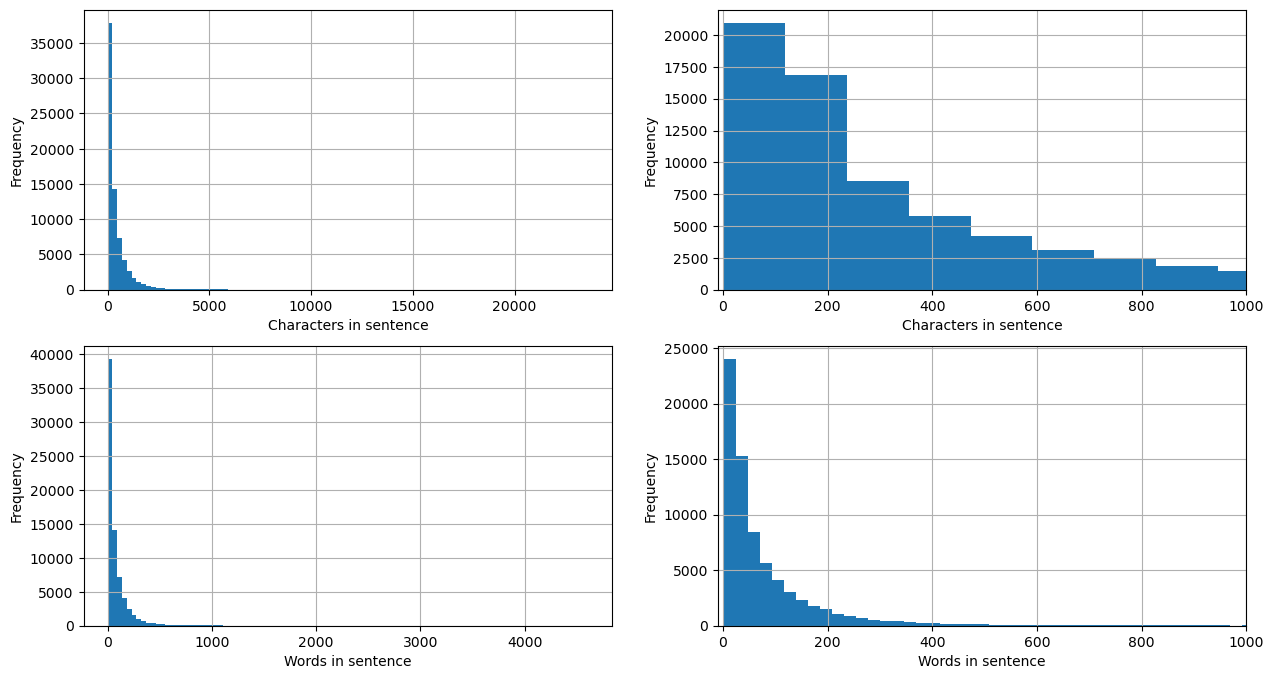

In [6]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
df["review_body"].str.len().hist(bins=100)
plt.ylabel("Frequency")
plt.xlabel("Characters in sentence")
plt.subplot(2, 2, 2)
df["review_body"].str.len().hist(bins=200)
plt.xlim(-10, 1000)
plt.ylabel("Frequency")
plt.xlabel("Characters in sentence")

plt.subplot(2, 2, 3)
df["review_body"].str.split().map(lambda x: len(x)).hist(bins=100)
plt.ylabel("Frequency")
plt.xlabel("Words in sentence")
plt.subplot(2, 2, 4)
df["review_body"].str.split().map(lambda x: len(x)).hist(bins=200)
plt.xlim(-10, 1000)
plt.ylabel("Frequency")
plt.xlabel("Words in sentence")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

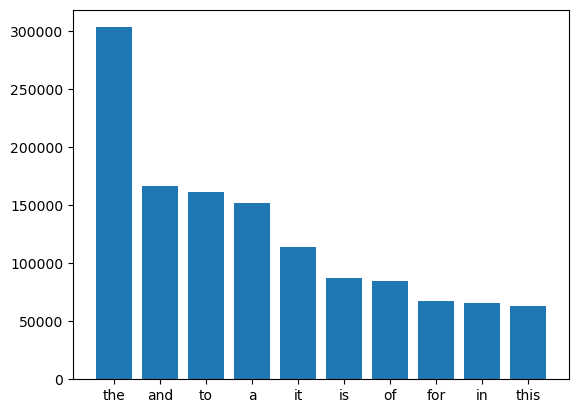

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop=set(stopwords.words("english"))

corpus=[]
new= df["review_body"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [9]:
corpus_stop = []
for word in corpus:
    if word not in stop:
        corpus_stop.append(word)

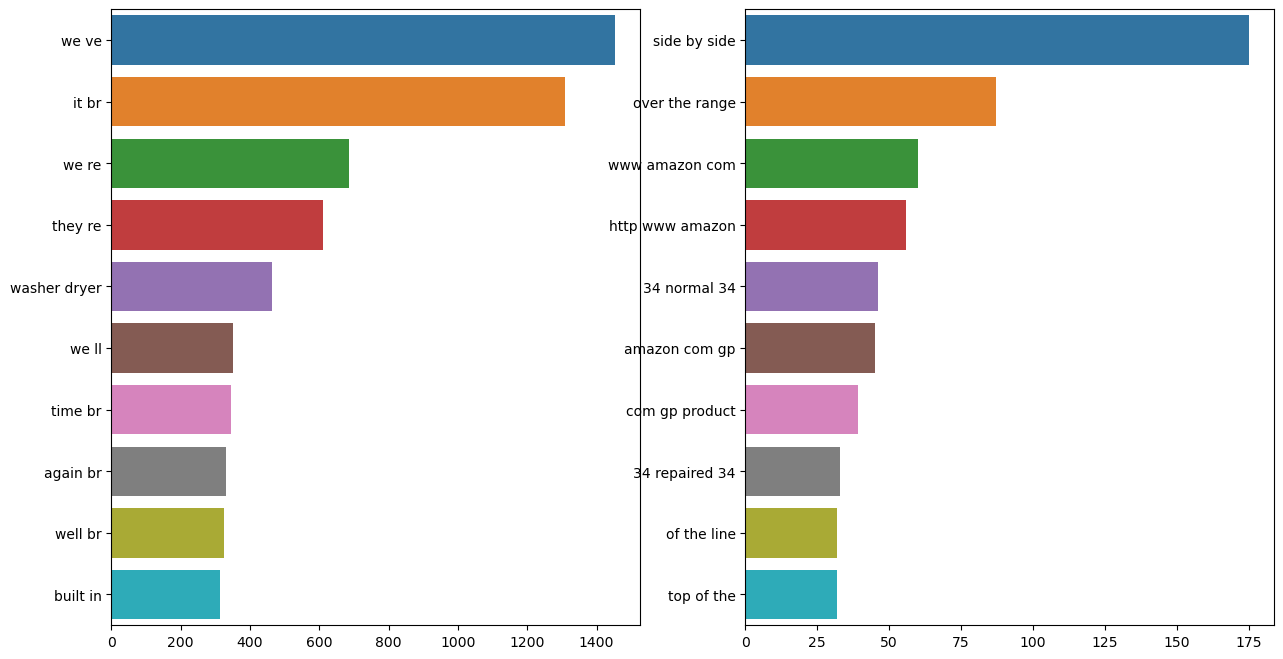

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


plt.figure(figsize = (15, 8))
plt.tight_layout()
plt.subplot(1, 2, 1)
top_n_bigrams=get_top_ngram(corpus_stop,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)
plt.subplot(1, 2, 2)
top_n_trigrams=get_top_ngram(corpus_stop,3)[:10] 
x,y=map(list,zip(*top_n_trigrams)) 
sns.barplot(x=y,y=x)
plt.show()

___

**2. Before implementing off-the-shelf topic models, it is useful to consider how to process data for topic analysis. Consider what you have learned so far to generate a processing function and discuss your findings. This should only operate on a word level!**

Below is a snippet to fetch some examples from the review corpus. You can use these to test your output.

In [11]:
reviews = df["review_body"].sample(frac=1).tolist()
for review in reviews[:5]:
    print(review)

Excellent! Arrived timely. Works perfectly. Great value.
We've had it for about 10 months now and are extremely happy with it.  We did a *lot* of research before choosing this one.  It's one of Consumer Report's highest rated, and Samsung is currently the top rated company for washers (although LG is also nearly as well rated).  If you do some research, it becomes clear very quickly that front-loading is a better choice than top loaders in every way (better cleaning performance, less wear and tear on your clothes, more load capacity, and of course far more efficient... using 1/3 as much water and detergent, and spinning at extremely high speeds to extract the water from your clothes before drying (which cuts down on the drying time and saves you energy and more wear-and-tear on your clothes).  This one isn't the top-of-the-line model from Samsung, but it has everything you really need for a low price.  The other ones also have features like steam, which are apparently more of a gimmick

In [12]:
# TODO: a preprocessing function to gather words/groups of words/chunks that you consider important for topic analysis/modeling
from typing import List
import spacy
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import SnowballStemmer

nlp = spacy.load("en_core_web_sm")
stemmer = SnowballStemmer("english")


def stem(text):
    return stemmer.stem(text)

def preprocess_for_topic(document: str) -> List[str]:
    """
    Preprocesses a document
    Args:
        document (str): The input document to be preprocessed.
    Returns:
        List[str]: A list of words obtained by splitting the document.

    Example:
        input: "This is a test."
        output: ["This", "is", "a", "test."]
    """
    #tokenized = nlp(document)

    preprocessed = []
    for token in gensim.utils.simple_preprocess(document, min_len=4):
        if token not in stop: #and len(token) > 3:
            preprocessed.append(stem(token))
    return preprocessed
    


In [13]:
for review in reviews[:5]:
    print(preprocess_for_topic(review))

['excel', 'arriv', 'time', 'work', 'perfect', 'great', 'valu']
['month', 'extrem', 'happi', 'research', 'choos', 'consum', 'report', 'highest', 'rate', 'samsung', 'current', 'rate', 'compani', 'washer', 'although', 'also', 'near', 'well', 'rate', 'research', 'becom', 'clear', 'quick', 'front', 'load', 'better', 'choic', 'loader', 'everi', 'better', 'clean', 'perform', 'less', 'wear', 'tear', 'cloth', 'load', 'capac', 'cours', 'effici', 'use', 'much', 'water', 'deterg', 'spin', 'extrem', 'high', 'speed', 'extract', 'water', 'cloth', 'dri', 'cut', 'dri', 'time', 'save', 'energi', 'wear', 'tear', 'cloth', 'line', 'model', 'samsung', 'everyth', 'realli', 'need', 'price', 'one', 'also', 'featur', 'like', 'steam', 'appar', 'gimmick', 'anyth', 'realli', 'need', 'note', 'front', 'loader', 'rememb', 'leav', 'door', 'crack', 'open', 'chanc', 'otherwis', 'moldi', 'insid', 'peopl', 'complain', 'onlin', 'even', 'know', 'fault', 'updat', 'year', 'still', 'work', 'great']
['worst', 'washer', 'ever', 

___
**3. Using the same data, implement a topic model with LDA using the Gensim library. Experiment with different topic counts (e.g., 3) and retrieve the top 5 words from each. Discuss your findings.**

In [14]:
# TODO: LDA topic model using Gensim (and NLTK/SpaCy/scikit-learn if preferred for processing)
# should use earlier preprocessing ideas from the course.
import re, logging, warnings, pyLDAvis
from pprint import pprint
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim  # don't skip this
%matplotlib inline


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [16]:
preprocessed = []
for rev in reviews:
    preprocessed.append(preprocess_for_topic(rev))
dic=corpora.Dictionary(preprocessed)
bow_corpus = [dic.doc2bow(doc) for doc in preprocessed]

In [17]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 3,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.021*"machin" + 0.020*"washer" + 0.018*"water" + 0.017*"wash" + 0.014*"cloth" + 0.013*"dryer" + 0.012*"clean" + 0.012*"dishwash" + 0.011*"load" + 0.010*"cycl"'),
 (1,
  '0.015*"great" + 0.014*"work" + 0.011*"look" + 0.009*"fridg" + 0.009*"unit" + 0.009*"like" + 0.008*"good" + 0.008*"well" + 0.007*"perfect" + 0.007*"instal"'),
 (2,
  '0.017*"replac" + 0.015*"work" + 0.015*"year" + 0.015*"part" + 0.013*"product" + 0.011*"servic" + 0.011*"would" + 0.010*"month" + 0.009*"problem" + 0.009*"call"')]

In [18]:
# Extract top contributing words for each topic
top_words_per_topic = []
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=5)
    top_words = [word for word, _ in topic_words]
    top_words_per_topic.append(top_words)


for i, words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {', '.join(words)}")

Topic 0: machin, washer, water, wash, cloth
Topic 1: great, work, look, fridg, unit
Topic 2: replac, work, year, part, product


___
**4. With the LDA model you trained above, perform topic prediction on a sample from the test dataset, and do a simple empirical evaluation of the results.**

In [19]:
import random
test_df = pd.read_csv("amazon_test.csv")
test_reviews = test_df["review_body"].tolist()

# some reviews are looong. let's filter out some on length.
test_reviews = [review for review in test_reviews if len(str(review).split()) < 30]
test_reviews = random.sample(population=test_reviews, k=10)
test_reviews

['Did just what it needed to.',
 'works great',
 'Fast delivery, perfect fit.',
 'Great idea',
 'Fixed up things right away. No more leaks. Pretty easy to install.',
 'All is good<br />Received it earlier the expected.<br />Will order again',
 'A+. Fixed our dryer right up',
 'Everything fit perfectly and functions perfectly.',
 'I like to have ice whenever I need and can carry it on the road with me.',
 'perfect']

In [34]:
# TODO: predict topics.
# input: 10 random samples from `amazon_test.csv`
# output: print the review, predicted topic, which words are contained within the predicted topic, along with the confidence score.

preprocessed_test_reviews = []
for test_rev in test_reviews:
    preprocessed_test_reviews.append(preprocess_for_topic(test_rev))


bow_test_corpus = [dic.doc2bow(doc) for doc in preprocessed_test_reviews]

predictions = lda_model[bow_test_corpus]

for i, pred in enumerate(predictions):
    max_prob_topic = max(pred, key=lambda x: x[1])
    topic_num, prob = max_prob_topic
    topic_keywords = ", ".join([word for word, _ in lda_model.show_topic(topic_num)])
    print(f"Review {i}:")
    print(f"Review body: {test_reviews[i]}")
    print(f"Predicted Topic: {topic_num}, Confidence: {prob:.4f}")
    print(f"Keywords: {topic_keywords}\n")

Review 0:
Review body: Did just what it needed to.
Predicted Topic: 1, Confidence: 0.5922
Keywords: great, work, look, fridg, unit, like, good, well, perfect, instal

Review 1:
Review body: works great
Predicted Topic: 1, Confidence: 0.7550
Keywords: great, work, look, fridg, unit, like, good, well, perfect, instal

Review 2:
Review body: Fast delivery, perfect fit.
Predicted Topic: 1, Confidence: 0.8181
Keywords: great, work, look, fridg, unit, like, good, well, perfect, instal

Review 3:
Review body: Great idea
Predicted Topic: 1, Confidence: 0.7491
Keywords: great, work, look, fridg, unit, like, good, well, perfect, instal

Review 4:
Review body: Fixed up things right away. No more leaks. Pretty easy to install.
Predicted Topic: 1, Confidence: 0.4849
Keywords: great, work, look, fridg, unit, like, good, well, perfect, instal

Review 5:
Review body: All is good<br />Received it earlier the expected.<br />Will order again
Predicted Topic: 2, Confidence: 0.8679
Keywords: replac, work, 

___

# Named Entity Recognition

Previously, you learned about noun phrases. Noun phrases such as "The slow white fox", a person "Name Nameson", a place "Mount Doom" or company names "NTNU", are some examples of what we consider *named entities*.


**1. Can you think of named entity categories that are *not* noun phrases?**

I am assuming that date and times are named entitys that are not not noun phrases. Additionally i think numbers would also not count as noun phrases.

___

Disambiguating (or entity linking) named entities is a crucial task to applications of NER and considers the problem of assigning an identifier to each entity, i.e., linking relevant entities together. The disambiguation process often incorporates external knowledge (knowledge bases).


Consider the sentences:

- "I ate an apple in New York"
- "New York Times wrote an article about Apple"
- "New York is also known as the Big Apple"

**2. How would you tackle the task of distinguishing the entities found here? Describe your approach either in text or by code.**

In [37]:
from nltk.corpus import wordnet as wn

sentences = [
    "I ate an apple in New York.",
    "New York Times wrote an article about Apple.",
    "New York is also known as the Big Apple."
]

# Named Entity Recognition
for sent in sentences:
    doc = nlp(sent)
    for ent in doc.ents:
        print("Entity:", ent.text, "| Type:", ent.label_)

        # Entity Linking
        synsets = wn.synsets(ent.text)
        if synsets:
            # Assuming first synset as the linked entity
            linked_entity = synsets[0].name()
            print("Linked Entity:", linked_entity)
            print()

Entity: New York | Type: GPE
Entity: New York Times | Type: ORG
Entity: Apple | Type: ORG
Linked Entity: apple.n.01

Entity: New York | Type: GPE
Entity: the Big Apple | Type: ORG


___

**3. Load the reviews dataset, and extract named entities and their category from 100 reviews. Visualize the named entity categories and their frequencies.**

- For visualization, you can use tables or plots (e.g. `matplotlib` or `seaborn`)

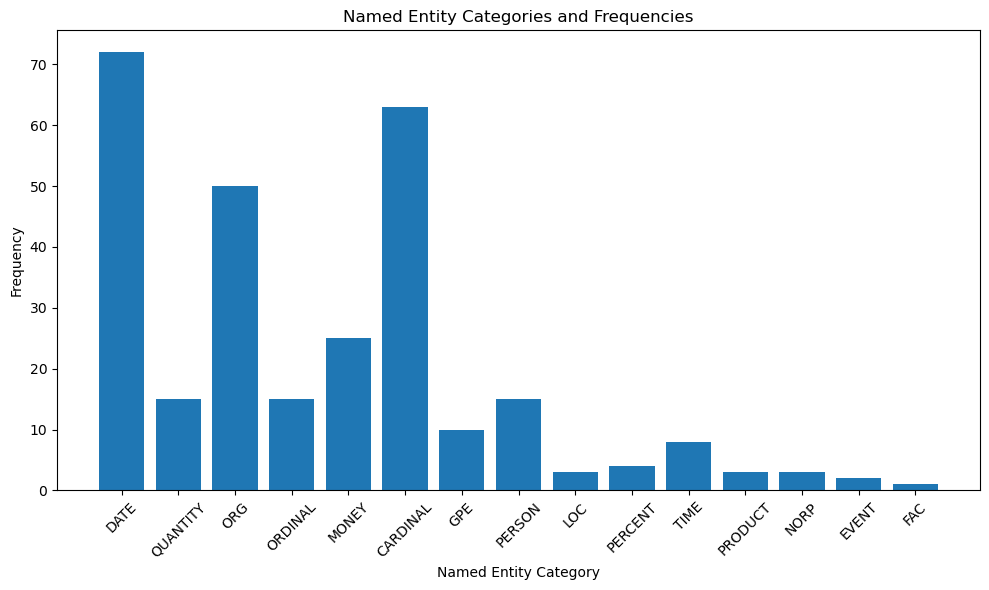

In [40]:
# TODO: group entity categories and visualize by frequency.

test_df = pd.read_csv("amazon_test.csv")
test_reviews = test_df["review_body"].tolist()

subset_reviews = test_reviews[:100]

entity_categories = {}

for review in subset_reviews:
    doc = nlp(review)
    for ent in doc.ents:
        entity_category = ent.label_
        if entity_category not in entity_categories:
            entity_categories[entity_category] = 1
        else:
            entity_categories[entity_category] += 1

plt.figure(figsize=(10, 6))
plt.bar(entity_categories.keys(), entity_categories.values())
plt.xlabel('Named Entity Category')
plt.ylabel('Frequency')
plt.title('Named Entity Categories and Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()